### IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\shampoo.csv")


### Dataset Description

#### **Overview:**
The dataset consists of **36 observations** with **2 columns**. It represents shampoo sales data over time.

#### **Columns Description:**
1. **Month** (object): The time period, formatted as `"Year-Month"` (e.g., `1-01` represents January of Year 1).
2. **Sales** (float): The sales figures for each corresponding month.

#### **Dataset Summary:**
- Total rows: **36**
- Total columns: **2**
- No missing values.
- Data Type:
  - `Month`: Categorical (Time-based)
  - `Sales`: Numerical (Continuous)

In [4]:
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [6]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [7]:
df['Time'] = range(1, len(df) + 1)

In [8]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')


In [9]:
df = df.dropna()

In [10]:
df['Sales'] = df['Sales'].astype(float)
states = df['Sales'].values.reshape(-1, 1)
actions = np.linspace(min(states), max(states), num=10).flatten()

In [11]:
scaler = MinMaxScaler()
numeric_columns = ['Sales', 'Time']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

### Feature Correlation Heatmap

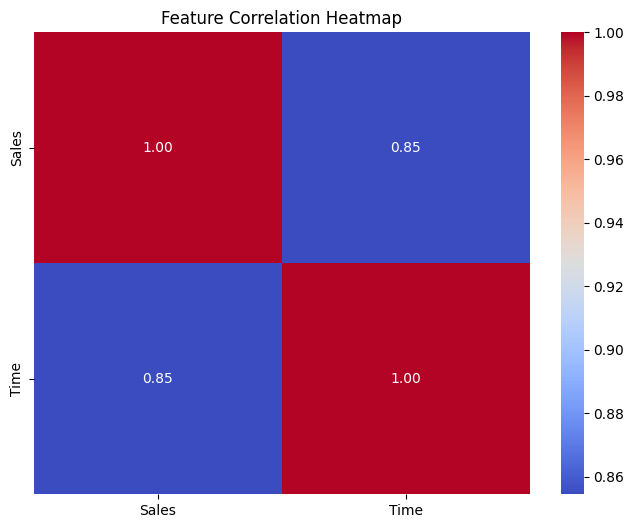

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

### **Observation:**  
The heatmap visualizes the correlation between different numerical features in the dataset. Strong positive correlations (closer to 1) indicate that two features increase together, while strong negative correlations (closer to -1) suggest an inverse relationship. Weak or near-zero correlations imply little to no direct relationship between features.  

### **Conclusion:**  
Analyzing feature correlations helps in understanding data dependencies and potential redundancies. Highly correlated features may introduce multicollinearity, affecting model performance, while uncorrelated features provide diverse information useful for reinforcement learning. This insight assists in feature selection and designing a more effective learning strategy.

In [26]:
class SalesEnv:
    def __init__(self, states, actions):
        self.states = states
        self.actions = actions
        self.state_idx = 0

    def reset(self):
        self.state_idx = 0
        return self.states[self.state_idx]

    def step(self, action):
        true_value = self.states[self.state_idx]
        reward = float(-abs(true_value - action))  # Ensure reward is a scalar
        self.state_idx = (self.state_idx + 1) % len(self.states)
        next_state = self.states[self.state_idx]
        done = self.state_idx == len(self.states) - 1
        return next_state, reward, done

In [27]:
env = SalesEnv(states, actions)

In [28]:
tate = env.reset()
done = False

# Create a list to store results
results = []

while not done:
    action = np.random.choice(env.actions)  # Random action selection
    next_state, reward, done = env.step(action)
    
    # Append results as dictionary
    results.append({
        "Current State (Time, Sales)": tuple(states),
        "Action Taken": action,
        "Reward": round(reward, 4),
        "Next State (Time, Sales)": tuple(next_state)
    })
    
    state = next_state

C:\Users\DELL8\AppData\Local\Temp\ipykernel_52756\2938237062.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  reward = float(-abs(true_value - action))  # Ensure reward is a scalar


In [29]:
df_results = pd.DataFrame(results)


In [30]:
df_results

,"Current State (Time, Sales)",Action Taken,Reward,"Next State (Time, Sales)"
0,"([266.0], [145.9], [183.1], [119.3], [180.3], ...",431.911111,-165.9111,"(145.9,)"
1,"([266.0], [145.9], [183.1], [119.3], [180.3], ...",494.433333,-348.5333,"(183.1,)"
2,"([266.0], [145.9], [183.1], [119.3], [180.3], ...",431.911111,-248.8111,"(119.3,)"
3,"([266.0], [145.9], [183.1], [119.3], [180.3], ...",431.911111,-312.6111,"(180.3,)"
4,"([266.0], [145.9], [183.1], [119.3], [180.3], ...",244.344444,-64.0444,"(168.5,)"
5,"([266.0], [145.9], [183.1], [119.3], [180.3], ...",494.433333,-325.9333,"(231.8,)"
6,"([266.0], [145.9], [183.1], [119.3], [180.3], ...",619.477778,-387.6778,"(224.5,)"
7,"([266.0], [145.9], [183.1], [119.3], [180.3], ...",494.433333,-269.9333,"(192.8,)"
8,"([266.0], [145.9], [183.1], [119.3], [180.3], ...",306.866667,-114.0667,"(122.9,)"
9,"([266.0], [145.9], [183.1], [119.3], [180.3], ...",431.911111,-309.0111,"(336.5,)"


In [31]:
df_results['State_X'] = df_results['Current State (Time, Sales)'].apply(lambda s: s[0])
df_results['State_Y'] = df_results['Current State (Time, Sales)'].apply(lambda s: s[1])


In [32]:
df_results['Step'] = range(1, len(df_results) + 1)  

### Reward Trend Over Time

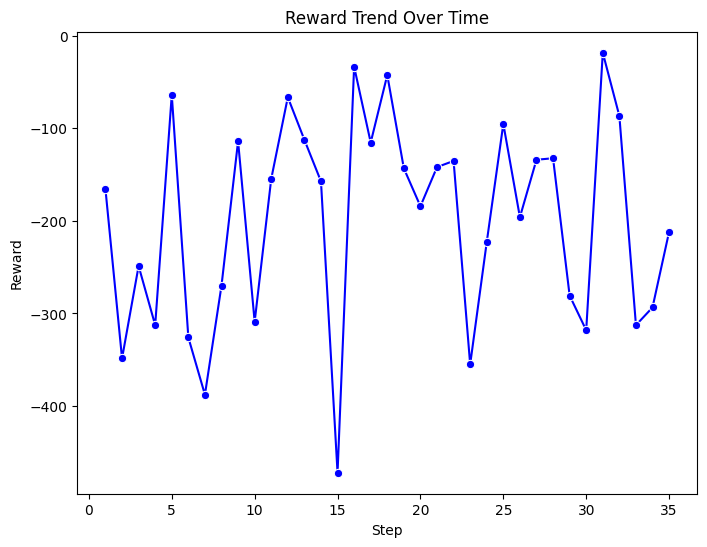

In [33]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df_results['Step'], y=df_results['Reward'], marker="o", color="b")
plt.title("Reward Trend Over Time")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.show()

### **Observation:**  
The line plot illustrates how rewards change over different steps during the reinforcement learning process. The trend may show fluctuations due to the agent's exploration and learning adjustments. A gradual increase in rewards suggests that the agent is improving its decision-making, whereas sharp declines or erratic patterns may indicate instability in learning.  

### **Conclusion:**  
Monitoring the reward trend over time helps evaluate the agent's learning progression. A stable or increasing trend suggests effective learning, whereas inconsistent rewards may require tuning of hyperparameters, adjusting the reward function, or modifying the exploration-exploitation strategy to enhance performance.

In [53]:
class QLearningAgent:
    def __init__(self, state_size, action_size, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.q_table = np.zeros((state_size, action_size)) # Create a Q-table initialized with zeros
        self.alpha = alpha # Learning rate
        self.gamma = gamma # Discount factor
        self.epsilon = epsilon # Exploration rate
        self.action_size = action_size # Number of actions available

    def choose_action(self, state_idx):
        if random.uniform(0, 1) < self.epsilon: # With probability epsilon, choose a random action (exploration)
            return random.randint(0, self.action_size - 1)  # Select a random action
        return np.argmax(self.q_table[state_idx]) # Otherwise, choose the action with the highest Q-value (exploitation)

    def update_q_table(self, state_idx, action, reward, next_state_idx):  # Find the best action for the next state (highest Q-value)
        # Q-learning update rule: Q(s,a) = Q(s,a) + α * (reward + γ * max(Q(s',a')) - Q(s,a))
        best_next_action = np.argmax(self.q_table[next_state_idx])
        self.q_table[state_idx, action] += self.alpha * (reward + self.gamma * self.q_table[next_state_idx, best_next_action] - self.q_table[state_idx, action])


In [54]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.model = self.build_model()
        self.memory = []  # Experience replay memory
        self.batch_size = 32  # Training batch size

    def build_model(self):
        model = keras.Sequential([
            layers.Dense(24, activation='relu', input_shape=(1,)),# First hidden layer with 24 neurons and ReLU activation
            layers.Dense(24, activation='relu'),# Second hidden layer with 24 neurons and ReLU activation
            layers.Dense(self.action_size, activation='linear')# Output layer with 'action_size' neurons (one for each action)
        ])
        model.compile(optimizer='adam', loss='mse')
        return model

    def choose_action(self, state):
        if np.random.rand() < 0.1:  # With probability 0.1 (epsilon), choose a random action (exploration)
            return random.randint(0, self.action_size - 1)# Select a random action
        q_values = self.model.predict(np.array([state]), verbose=0)[0]# Predict Q-values for the current state
        return np.argmax(q_values)# Choose the action with the highest Q-value (exploitation)
    def remember(self, experience):
        self.memory.append(experience)# Add experience to memory
        if len(self.memory) > 1000:  # Limit memory size
            self.memory.pop(0)# Remove the oldest experience (FIFO)

    def train(self, gamma=0.9):
        if len(self.memory) < self.batch_size:# If there are not enough samples in memory, skip training
            return
        minibatch = random.sample(self.memory, self.batch_size)  # Sample a random batch from memory
        for state, action, reward, next_state in minibatch:
             # Predict Q-values for the next state and compute the target Q-value using the Bellman equation
            target = reward + gamma * np.max(self.model.predict(np.array([next_state]), verbose=0)[0])
            target_values = self.model.predict(np.array([state]), verbose=0)[0]
            target_values[action] = target
             # Train the model using the updated Q-values
            self.model.fit(np.array([state]), np.array([target_values]), epochs=1, verbose=0)


In [59]:
agent_dqn = DQNAgent(len(env.states[0]), len(env.actions))

In [55]:
env = SalesEnv(states, actions)
q_agent = QLearningAgent(len(states), len(actions))
dqn_agent = DQNAgent(1, len(actions))

In [56]:
env = SalesEnv(states, actions)
agent = QLearningAgent(len(env.states), len(env.actions))

episodes = 1000
rewards_per_episode = []
state_visits = np.zeros(len(env.states))
for _ in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        state_idx = np.where((env.states == state).all(axis=1))[0][0]
        state_visits[state_idx] += 1
        action = agent.choose_action(state_idx)
        next_state, reward, done = env.step(action)
        next_state_idx = np.where((env.states == next_state).all(axis=1))[0][0]
        agent.update_q_table(state_idx, action, reward, next_state_idx)
        state = next_state
        total_reward += reward
    rewards_per_episode.append(total_reward)

C:\Users\DELL8\AppData\Local\Temp\ipykernel_52756\2938237062.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  reward = float(-abs(true_value - action))  # Ensure reward is a scalar


### **Reward Trend Over Episodes**  

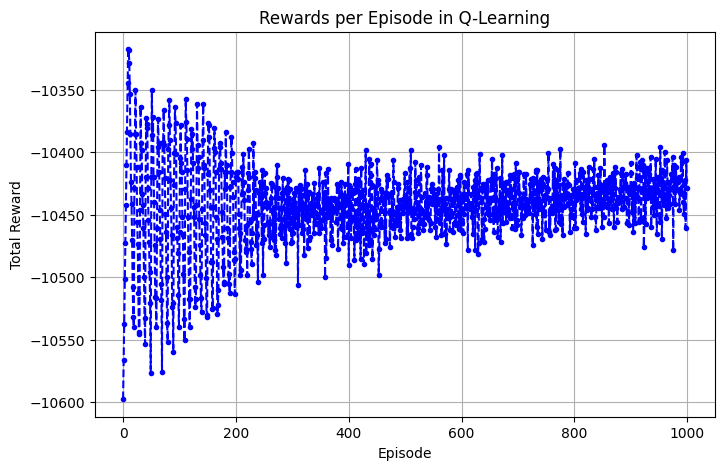

In [57]:
plt.figure(figsize=(8, 5))
plt.plot(rewards_per_episode, color='blue', linestyle='dashed', marker='o', markersize=3)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Rewards per Episode in Q-Learning")
plt.grid()
plt.show()


### **Observation:**  
The line plot visualizes the total reward obtained in each episode during the Q-learning process. The trend may exhibit fluctuations as the agent explores and learns optimal actions. A consistent increase in rewards over episodes indicates that the agent is effectively learning from its environment, whereas irregular patterns or declining rewards suggest instability in learning or suboptimal policy updates.  

### **Conclusion:**  
Tracking the reward trend across episodes is essential to assess the agent's learning efficiency. A steady rise in rewards signifies successful learning, while erratic trends may indicate the need for hyperparameter tuning, a refined reward function, or adjustments in the exploration-exploitation balance to improve overall performance.  


### Q-Table Heatmap with Detailed Values

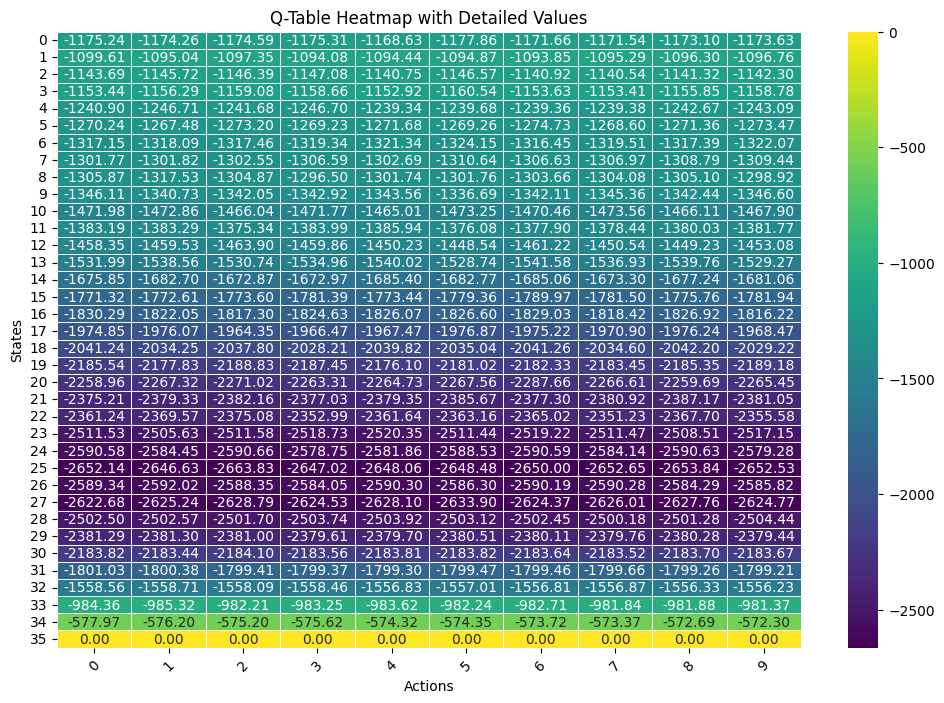

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(agent.q_table, cmap="viridis", annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Q-Table Heatmap with Detailed Values")
plt.xlabel("Actions")
plt.ylabel("States")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


### **Observation:**  
The heatmap represents the Q-table values learned by the agent during the reinforcement learning process. Each cell indicates the Q-value for a specific state-action pair, where higher values (brighter regions) suggest preferred actions in given states. A well-structured Q-table often shows distinguishable patterns, indicating the agent has learned optimal policies. Sparse or erratic values may suggest instability in learning.  

### **Conclusion:**  
Visualizing the Q-table helps analyze the agent's decision-making strategy. A structured Q-table with clear value differentiations suggests effective learning, whereas irregular patterns may indicate the need for further training, better exploration strategies, or hyperparameter tuning to refine policy learning.  


## **Cumulative Reward Progression** 

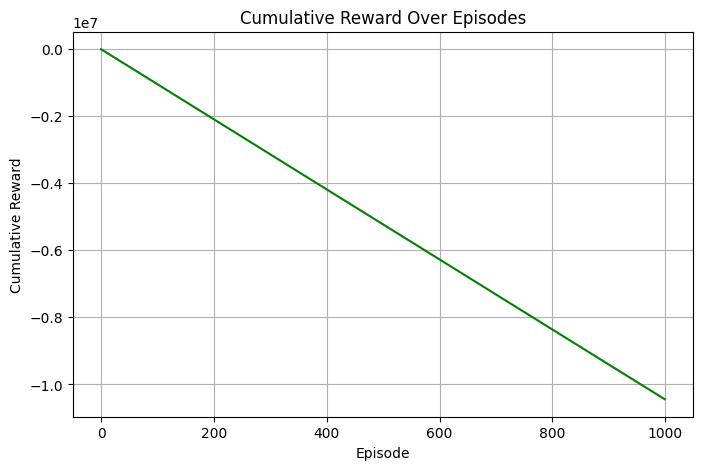

In [60]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(rewards_per_episode), color='green')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Episodes")
plt.grid()
plt.show()



### **Observation:**  
The plot visualizes the cumulative reward accumulated over episodes during training. A steadily increasing trend suggests that the agent is progressively learning and improving its policy. However, if the curve flattens or fluctuates significantly, it may indicate challenges in learning, such as ineffective exploration or suboptimal reward function tuning.  

### **Conclusion:**  
Tracking cumulative rewards provides insight into the overall progress of reinforcement learning. A consistently rising curve confirms stable learning, while irregularities may require adjustments in learning rate, exploration strategy, or reward mechanisms to enhance performance.  


In [61]:
print("\nFinal Q-Table:")
pd.DataFrame(agent.q_table)


Final Q-Table:


,0,1,2,3,4,5,6,7,8,9
0,-1175.236575,-1174.262469,-1174.586990,-1175.309201,-1168.634356,-1177.863319,-1171.661444,-1171.537239,-1173.099502,-1173.633725
1,-1099.605229,-1095.043169,-1097.351172,-1094.084488,-1094.435057,-1094.869899,-1093.847643,-1095.291373,-1096.298444,-1096.757685
2,-1143.686407,-1145.722210,-1146.394079,-1147.083714,-1140.751559,-1146.569560,-1140.923044,-1140.535334,-1141.315708,-1142.299477
3,-1153.435804,-1156.285332,-1159.083962,-1158.659234,-1152.917969,-1160.539875,-1153.625840,-1153.408922,-1155.845914,-1158.778527
4,-1240.896514,-1246.714613,-1241.679203,-1246.695852,-1239.344225,-1239.678797,-1239.363302,-1239.381409,-1242.668946,-1243.085286
5,-1270.237173,-1267.478284,-1273.196077,-1269.226470,-1271.682107,-1269.260787,-1274.727825,-1268.598531,-1271.363009,-1273.466791
6,-1317.151450,-1318.094904,-1317.459093,-1319.344268,-1321.339002,-1324.147390,-1316.451071,-1319.509572,-1317.393632,-1322.070206
7,-1301.768935,-1301.818991,-1302.549771,-1306.593690,-1302.686325,-1310.642564,-1306.628774,-1306.967303,-1308.790129,-1309.439433
8,-1305.869584,-1317.534047,-1304.873625,-1296.503839,-1301.740615,-1301.763695,-1303.661343,-1304.081873,-1305.095189,-1298.924485
9,-1346.112295,-1340.730816,-1342.046444,-1342.916939,-1343.555048,-1336.693398,-1342.114031,-1345.362537,-1342.441115,-1346.595317


In [62]:
best_actions = np.argmax(agent.q_table, axis=1)
print("\nBest actions for each state:")
best_actions


Best actions for each state:


array([4, 6, 7, 4, 4, 1, 6, 0, 3, 5, 4, 2, 5, 5, 2, 0, 9, 2, 3, 4, 0, 0,
       7, 1, 3, 1, 3, 0, 7, 9, 1, 9, 9, 9, 9, 0], dtype=int64)

### **Comparison of RL Policy vs. Random Policy**  

In [63]:
random_actions = np.random.randint(0, len(env.actions), size=len(env.states))
policy_comparison = pd.DataFrame({
    'State Index': list(range(len(env.states))),
    'Best Action (RL)': best_actions,
    'Random Action': random_actions
})
print("\nComparison of RL Policy vs. Random Policy:")
policy_comparison.head(10)


Comparison of RL Policy vs. Random Policy:


,State Index,Best Action (RL),Random Action
0,0,4,3
1,1,6,1
2,2,7,5
3,3,4,1
4,4,4,9
5,5,1,2
6,6,6,9
7,7,0,5
8,8,3,9
9,9,5,7


### **Observation:**  
The table presents a comparison between the best actions chosen by the reinforcement learning (RL) agent and randomly selected actions for each state. The RL-based policy aims to make optimal decisions based on learned experiences, while the random policy selects actions arbitrarily. Differences between the two highlight the RL agent’s ability to identify patterns and improve decision-making over time.  

### **Conclusion:**  
A structured policy derived from reinforcement learning typically outperforms a random policy by selecting actions that maximize rewards. If the best actions align closely with random actions, further training, hyperparameter tuning, or refining the reward function may be necessary to improve learning effectiveness.  


### **Impact of Reinforcement Learning on Sales Forecasting**  

1. **Improved Sales Prediction** – RL learns from past trends to enhance forecasting accuracy dynamically.  
2. **Adaptive Learning** – The model continuously adjusts to seasonal trends and unexpected sales variations.  
3. **Reward-Based Optimization** – A reward function helps refine predictions by penalizing errors and reinforcing accuracy.  
4. **Reduced Forecasting Errors** – Iterative learning minimizes deviations between actual and predicted sales.  
5. **Scalability & Real-World Use** – The approach extends to inventory management, demand forecasting, and pricing strategies.  

This shifts forecasting from a **static approach** to a **self-improving system** that adapts over time.  



## Can We Use Reinforcement Learning (RL) for Analysis
### **When NOT to Use RL: Standard Data Analysis & Forecasting**
If the goal is to:
- Analyze past trends (e.g., finding seasonal patterns)
- Predict future sales (e.g., next month's demand)
- Understand correlations (e.g., sales vs. marketing spend)

Then **Reinforcement Learning is NOT the best approach**. Instead, we should use:
- **Time-Series Forecasting Models**: ARIMA, SARIMA, Prophet (for trend prediction)
- **Machine Learning Models**: XGBoost, LSTMs (for demand prediction)
- **Statistical Analysis**: Moving averages, regression (for insights)

**Better Alternative?** Use time-series forecasting models to predict future sales instead of RL.

---

### **When RL CAN Be Used: Decision-Making Problems**
RL is useful when we need to **make sequential decisions over time** based on changing conditions. Here are some potential RL applications:

#### **Inventory Replenishment (Stock Management)**
   - **Problem:** How much shampoo should be reordered each day/week?
   - **State:** Current stock level, past sales, lead time
   - **Action:** Order a certain quantity
   - **Reward:** Profit (or penalty for stockout/excess inventory)

#### **Dynamic Pricing Strategy**
   - **Problem:** Adjust shampoo prices dynamically based on demand and competition.
   - **State:** Current price, past sales, market trends
   - **Action:** Increase or decrease price
   - **Reward:** Maximized revenue or profit

#### **Marketing Spend Optimization**
   - **Problem:** Allocate the advertising budget effectively to boost sales.
   - **State:** Sales trends, ad spend, seasonal factors
   - **Action:** Adjust marketing spend
   - **Reward:** Increased sales/conversion rate

---

### ** Conclusion: Should We Use RL?**
- **For pure data analysis or forecasting → Use traditional ML/Time-Series methods.**
- **For decision-making problems (pricing, inventory, marketing) → RL is a good fit.**



